## House price prediction models

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [2]:
# import the data files into DataFrame here
# import data from csv to DataFrame
df1= pd.read_csv("WA_data/data.csv")


In [3]:
# examine the data
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
# Data cleaning step 1 : appending dataframes
len(df1)


4600

In [5]:
df2 = df1.drop(columns=['waterfront','country','view'])

In [6]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [7]:
df2['statezip'].unique()
#iterrows()
#apply( function... )

array(['WA 98133', 'WA 98119', 'WA 98042', 'WA 98008', 'WA 98052',
       'WA 98115', 'WA 98038', 'WA 98045', 'WA 98155', 'WA 98105',
       'WA 98074', 'WA 98106', 'WA 98007', 'WA 98092', 'WA 98198',
       'WA 98006', 'WA 98102', 'WA 98011', 'WA 98125', 'WA 98003',
       'WA 98136', 'WA 98033', 'WA 98029', 'WA 98117', 'WA 98034',
       'WA 98072', 'WA 98023', 'WA 98107', 'WA 98166', 'WA 98116',
       'WA 98024', 'WA 98055', 'WA 98077', 'WA 98027', 'WA 98059',
       'WA 98075', 'WA 98014', 'WA 98065', 'WA 98199', 'WA 98053',
       'WA 98058', 'WA 98122', 'WA 98103', 'WA 98112', 'WA 98005',
       'WA 98118', 'WA 98177', 'WA 98004', 'WA 98019', 'WA 98144',
       'WA 98168', 'WA 98001', 'WA 98056', 'WA 98146', 'WA 98028',
       'WA 98148', 'WA 98057', 'WA 98040', 'WA 98010', 'WA 98051',
       'WA 98031', 'WA 98109', 'WA 98030', 'WA 98126', 'WA 98032',
       'WA 98178', 'WA 98288', 'WA 98108', 'WA 98070', 'WA 98188',
       'WA 98002', 'WA 98039', 'WA 98022', 'WA 98068', 'WA 980

In [8]:
df2[['state','zip']] = df2.statezip.str.split(" ",expand=True,)

In [9]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,state,zip
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,WA,98133
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,WA,98119
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,WA,98042
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,WA,98008
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,WA,98052


In [10]:
df2.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
state             object
zip               object
dtype: object

In [11]:
df2['year_sold'] = pd.to_datetime(df2.date)

df2['year_sold']


0      2014-05-02
1      2014-05-02
2      2014-05-02
3      2014-05-02
4      2014-05-02
          ...    
4595   2014-07-09
4596   2014-07-09
4597   2014-07-09
4598   2014-07-10
4599   2014-07-10
Name: year_sold, Length: 4600, dtype: datetime64[ns]

In [12]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,state,zip,year_sold
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,WA,98133,2014-05-02
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,WA,98119,2014-05-02
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,WA,98042,2014-05-02
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,WA,98008,2014-05-02
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,WA,98052,2014-05-02


In [13]:
df2['age_of_house'] = 2021 - df2.yr_built

In [14]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,state,zip,year_sold,age_of_house
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,WA,98133,2014-05-02,66
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,WA,98119,2014-05-02,100
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,WA,98042,2014-05-02,55
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,WA,98008,2014-05-02,58
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,WA,98052,2014-05-02,45


In [15]:
df2.to_csv('WA_housing_price_cleaned.csv')

In [16]:
df2.shape

(4600, 19)

In [17]:
df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,age_of_house
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,3.451739,1827.265435,312.081522,1970.786304,808.608261,50.213696
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.677230,862.168977,464.137228,29.731848,979.414536,29.731848
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,7.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,24.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,3.000000,1590.000000,0.000000,1976.000000,0.000000,45.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,70.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,121.000000


In [18]:
df2["price"]

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [19]:
df2[df2['price'] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,state,zip,year_sold,age_of_house
4354,5/5/2014 0:00,0.0,3,1.75,1490,10125,1.0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,WA,98001,2014-05-05,59
4356,5/5/2014 0:00,0.0,4,2.75,2600,5390,1.0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,WA,98199,2014-05-05,61
4357,5/5/2014 0:00,0.0,6,2.75,3200,9200,1.0,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,WA,98146,2014-05-05,68
4358,5/6/2014 0:00,0.0,5,3.50,3480,36615,2.0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,WA,98075,2014-05-06,38
4361,5/7/2014 0:00,0.0,5,1.50,1500,7112,1.0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,WA,98166,2014-05-07,101
4362,5/7/2014 0:00,0.0,4,4.00,3680,18804,2.0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,WA,98074,2014-05-07,31
4374,5/9/2014 0:00,0.0,2,2.50,2200,188200,1.0,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,WA,98022,2014-05-09,14
4376,5/9/2014 0:00,0.0,4,2.25,2170,10500,1.0,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,WA,98166,2014-05-09,61
4382,5/12/2014 0:00,0.0,5,4.50,4630,6324,2.0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,WA,98065,2014-05-12,15
4383,5/13/2014 0:00,0.0,5,4.00,4430,9000,2.0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,WA,98004,2014-05-13,8


In [20]:
len(df2[df2['price'] == 0])

49

In [21]:
df3 = (df2[df2['price'] > 0])

In [22]:
df3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,state,zip,year_sold,age_of_house
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,WA,98133,2014-05-02,66
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,WA,98119,2014-05-02,100
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,WA,98042,2014-05-02,55
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,WA,98008,2014-05-02,58
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,WA,98052,2014-05-02,45


In [23]:
df3.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,age_of_house
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,3.449352,1822.221710,310.150516,1970.795649,808.564052,50.204351
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.675160,854.452888,461.987629,29.760073,979.421487,29.760073
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,7.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,24.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,3.000000,1590.000000,0.000000,1976.000000,0.000000,45.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000,70.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,121.000000


In [24]:
df3[df3['price'] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,state,zip,year_sold,age_of_house


In [25]:
df3.bathrooms.unique()

array([1.5 , 2.5 , 2.  , 2.25, 1.  , 1.75, 2.75, 3.  , 3.25, 3.5 , 8.  ,
       4.25, 4.  , 3.75, 5.  , 4.5 , 5.75, 1.25, 6.5 , 4.75, 0.75, 5.25,
       5.5 , 6.25, 0.  , 6.75])

In [26]:
df3.bedrooms.unique()

array([3, 5, 4, 2, 6, 7, 9, 1, 8, 0], dtype=int64)

In [27]:
df4 = (df3[df3['bedrooms'] > 0])

In [28]:
df4.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,state,zip,year_sold,age_of_house
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,WA,98133,2014-05-02,66
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,WA,98119,2014-05-02,100
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,WA,98042,2014-05-02,55
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,WA,98008,2014-05-02,58
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,WA,98052,2014-05-02,45


In [29]:
len(df4)

4549

In [30]:
df4.bathrooms.unique()

array([1.5 , 2.5 , 2.  , 2.25, 1.  , 1.75, 2.75, 3.  , 3.25, 3.5 , 8.  ,
       4.25, 4.  , 3.75, 5.  , 4.5 , 5.75, 1.25, 6.5 , 4.75, 0.75, 5.25,
       5.5 , 6.25, 6.75])

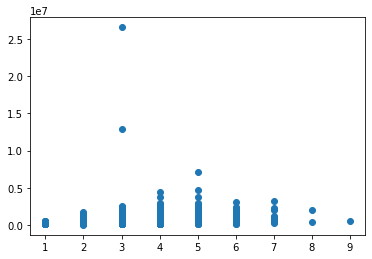

In [36]:
plt.scatter(df4['bedrooms'], df4['price'])

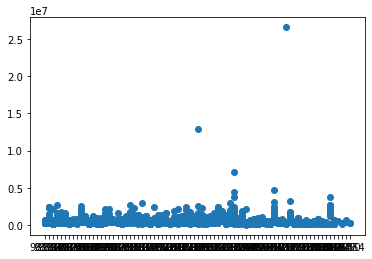

In [38]:
plt.scatter(df4['zip'], df4['price'])

In [42]:
df5 = (df4[df4['price'] < 12000000])

In [43]:
len(df5)

4547

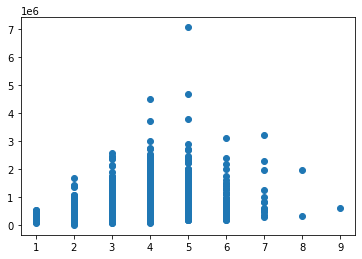

In [45]:
plt.scatter(df5['bedrooms'], df5['price'])

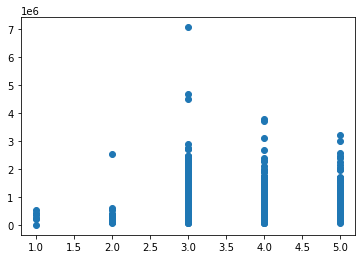

In [46]:
plt.scatter(df5['condition'], df5['price'])

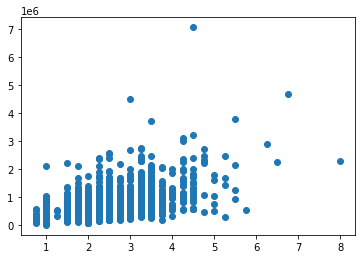

In [47]:
plt.scatter(df5['bathrooms'], df5['price'])

In [48]:
df5.to_csv('WA_housing_for_predicting_cleaned.csv')